### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import os
ldir = os.chdir(r'C:\Users\Gergely\Downloads')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

import ppscore as pps

C:\Users\Gergely\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Lab1data dataset beolvasása

In [2]:
df = pd.read_csv('Lab1data.txt', header=None, names=['X', 'y'])
print(df.shape)
df.head()

(97, 2)


,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Reshaped variables

In [3]:
X = np.array(df.X).reshape(-1, 1)
y = np.array(df.y).reshape(-1, 1)

### Adatok ábrázolása

Text(0, 0.5, 'Profit in $10 000s ')

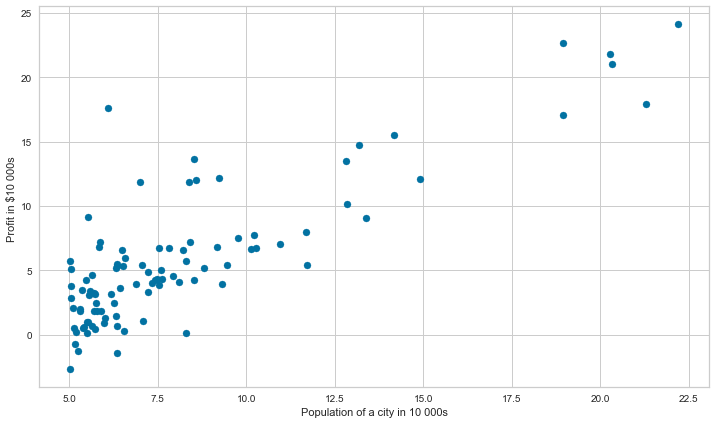

In [4]:
plt.figure(figsize=(12, 7))
plt.scatter(df.X, df.y)
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")

### Train Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, df.y, test_size=0.2, random_state=42)

### LinearRegression

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('train r2: ', model.score(X_train, y_train))
print('test r2:', model.score(X_test, y_test))
print('predicted r2:', r2_score(y_test, y_pred))

train r2:  0.7513605550608946
test r2: 0.5003441133385782
predicted r2: 0.5003441133385782


### PP score

A lineáris modellhez képest mennyi prediktív lehetőség van még benne

In [7]:
pps.score(df, 'X', 'y', sample=1000)

{'x': 'X',
 'y': 'y',
 'task': 'regression',
 'ppscore': 0.07497403092835697,
 'metric': 'mean absolute error',
 'baseline_score': 3.8149134020618556,
 'model_score': 3.5288939666666663,
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')}

In [8]:
pps.matrix(df)

,X,y
X,1.000000,0.130036
y,0.074974,1.000000


### Train egyenes

train r2:  0.7513605550608946


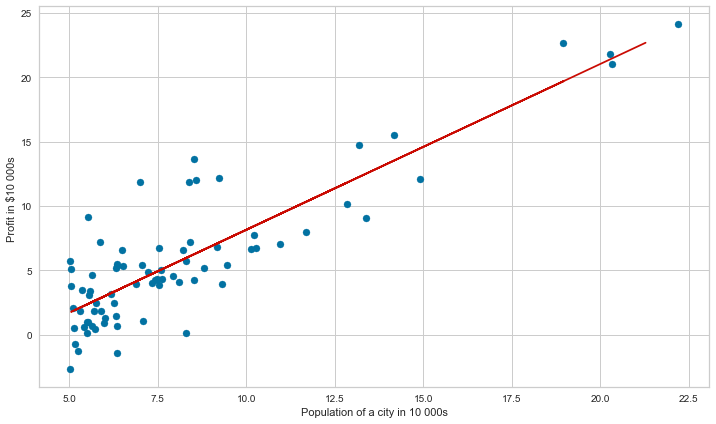

In [9]:
plt.figure(figsize=(12, 7))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, c='r')
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")

print('train r2: ', model.score(X_train, y_train))

### Test egyenes

test r2: 0.5003441133385782


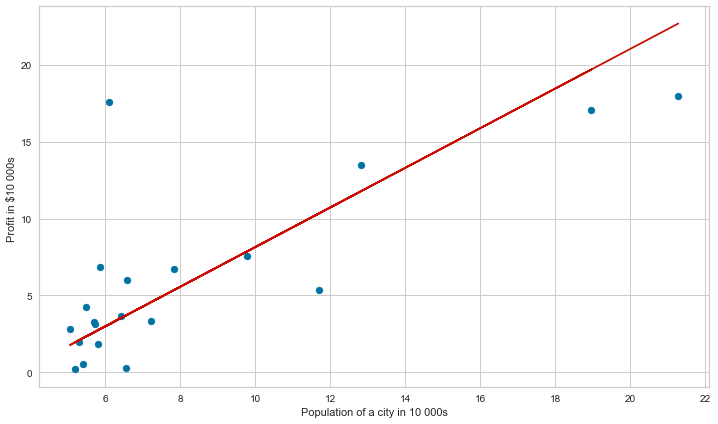

In [10]:
plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")

print('test r2:', model.score(X_test, y_test))

### Residuals Plot

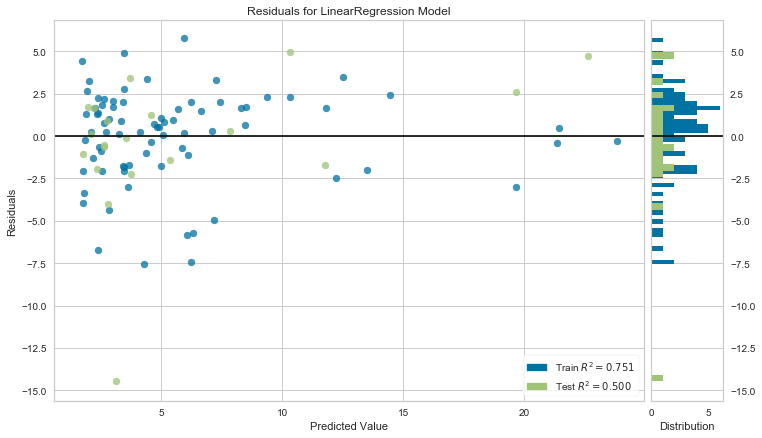

In [11]:
plt.figure(figsize=(12, 7))
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Prediction Error

PredictionError helps find where the regression is making the most errors.

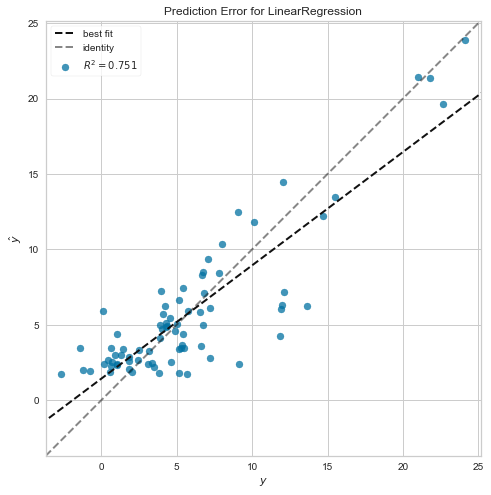

In [12]:
plt.figure(figsize=(8, 8))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_train, y_train)  # Evaluate the model on the test data
visualizer.show()

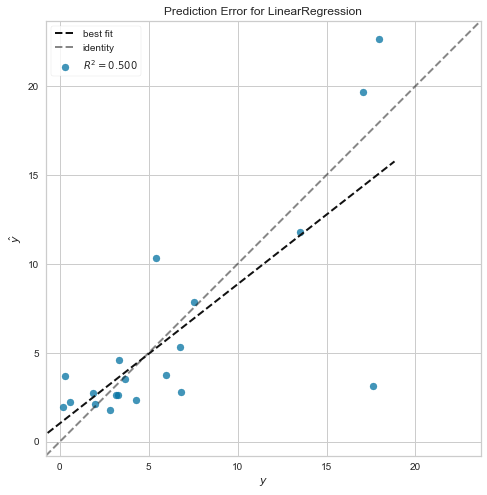

In [13]:
plt.figure(figsize=(8, 8))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

C:\Users\Gergely\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


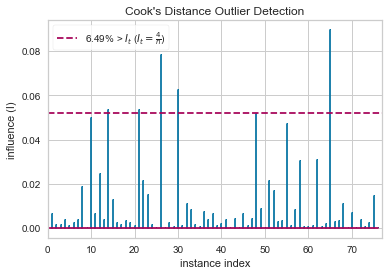

In [14]:
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(X_train, y_train)
visualizer.show()